# Interactive Heat Loss Plot

In [1]:
#Import Libraries
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from ipywidgets import interact, interactive, fixed, FloatSlider
import ipywidgets as widgets

%run conservation_equations.ipynb

0.0019392683356514282


### Pipe and Insulation Variables

In [2]:
#Convective heat transfer coefficient (h; W/m**K)
h_steam_pipe = 36
h_insulation_air = 7
#Insulation
t_insulation = 2 * 0.0254    #insulation thickness (m)
k_insulation = 0.05   #insulation's thermal conductivity (W/m** K)
#Pipe
t_pipe = 0.01         #pipeline thickness (m)
k_pipe = 56           #pipe's thermal conductivity (W/m** K)
id_pipe = 0.25        #pipe's inner diameter (m)
l_pipe = 6000         #length of pipeline (m)
#Temp
t1 = 180.21           #temp inside the pipeline
t2 = 23               #temp; atmospheric 

## Define function for interactive plot

In [3]:
def inter_loss(Thermal_Conductivity, Insulation_Thickness):
    matplotlib.rcParams['figure.figsize'] = (8.0, 5)
    tot_loss = []
    
    Insulation_Thickness = Insulation_Thickness*0.0254
    #Convective heat transfer coefficient (h; W/m**K)
    h_in = 36
    h_out = 7
    #Pipe
    t_pipe = 0.01         #pipeline thickness (m)
    k_a = 56           #pipe's thermal conductivity (W/m** K)
    id_pipe = 0.25        #pipe's inner diameter (m)
    l_pipe = 6000         #length of pipeline (m)
    #Temp
    t_in = 180.21           #temp inside the pipeline
    t_out = 23               #temp; atmospheric
    
    r1 = id_pipe
    r2 = id_pipe + t_pipe
    r3 = id_pipe + t_pipe + Insulation_Thickness
    
    nL = 6     #number of divisions
    dL = l_pipe/nL   #delta L; increment length

    #create the list of distances that will be used to calc heat_loss 
    x = np.linspace(0, l_pipe, nL+1)
    
    for i in x:
        loss = heat_transfer(i, t_in, t_out, h_in, h_out, k_a, Thermal_Conductivity, r1, r2, r3)
        tot_loss.append(loss)
    inter_loss = np.absolute(tot_loss)/1000000
    #calculate the heat loss for the given list of distances 'x'; output will be a list of heat loss also
    normal_loss = calc_heat_loss(x, t1, t2, h_steam_pipe, h_insulation_air, k_pipe, 0.05, r1, r2, .3108)
    #for max heat loss; no insulation; insulation thickness = 0; thus r2 = r3
    max_loss = calc_heat_loss(x, t1, t2, h_steam_pipe, h_insulation_air, k_pipe, k_insulation, r1, r2, r2)
    #Define the plot properties
    plt.plot(x, normal_loss, '--b', alpha=0.8, label='with insulation')
    plt.plot(x, max_loss, '--r', label='no insulation')
    plt.plot(x, inter_loss, '--c', alpha=0.8, label='Interactive Plot')
    plt.xlabel("Pipe Length (m)")
    plt.ylabel("Heat Loss (MWe)")
    plt.legend(loc=2)
    plt.grid(True)
    plt.show()
    print ('{:^16}'.format('Distance (m)'), '{:^16}'.format('Heat Loss (MWe)'))
    for i in range(len(x)): 
        print ('{:^16.0f}'.format(x[i]), \
            '{:^16.2f}'.format(inter_loss[i]))
    #return inter_loss

### Interactive Plot Input

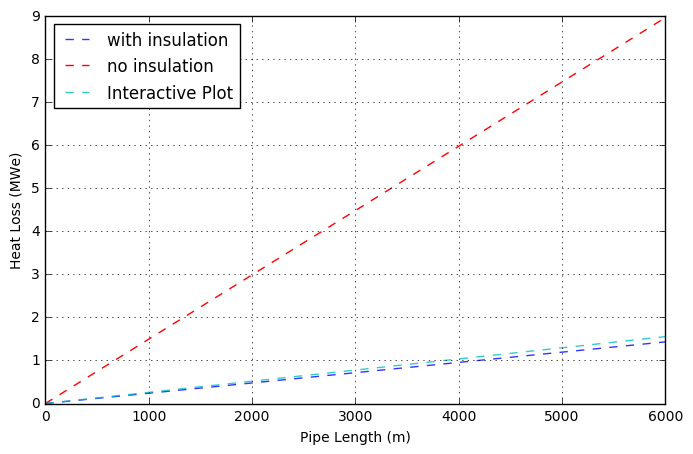

  Distance (m)   Heat Loss (MWe) 
       0               0.00      
      1000             0.26      
      2000             0.52      
      3000             0.78      
      4000             1.04      
      5000             1.29      
      6000             1.55      


In [4]:
x_widget = FloatSlider(min=0.01, max=0.2, step=0.005, value = 0.05)      #thermal conductivity 0 to 0.1
y_widget = FloatSlider(min=0.0, max=8.0, step=0.1, value=2.0)           #thickness 0 to 10

interact(inter_loss,Thermal_Conductivity=x_widget, Insulation_Thickness=y_widget)

# Effect of Increasing Insulation Thickness

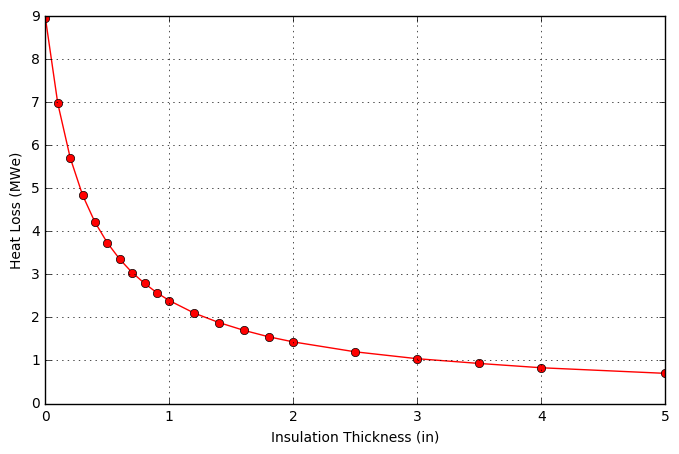

       Insulation Thickness (in)         Heat Loss (MWe) 
                  0.00                         8.96      
                  0.10                         6.97      
                  0.20                         5.71      
                  0.30                         4.84      
                  0.40                         4.21      
                  0.50                         3.73      
                  0.60                         3.35      
                  0.70                         3.04      
                  0.80                         2.79      
                  0.90                         2.57      
                  1.00                         2.39      
                  1.20                         2.10      
                  1.40                         1.88      
                  1.60                         1.70      
                  1.80                         1.55      
                  2.00                         1.43      
              

In [5]:
Insulation_Thickness = (0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.2, 1.4, 1.6, 1.8, 2, 2.5, 3.0, 3.5, 4, 5) 
Heat_Loss = (8.96, 6.97, 5.71, 4.84, 4.21, 3.73, 3.35, 3.04, 2.79, 2.57, 2.39, 2.1, 1.88, 1.7, 1.55, 1.43, \
             1.2, 1.04, 0.93, 0.83, 0.7)

plt.plot(Insulation_Thickness, Heat_Loss, 'ro-')
plt.xlabel("Insulation Thickness (in)")
plt.ylabel("Heat Loss (MWe)")
plt.grid(True)
plt.show()

print ('{:^40}'.format('Insulation Thickness (in)'), '{:^16}'.format('Heat Loss (MWe)'))
for i in range(len(Heat_Loss)): 
    print ('{:^40.2f}'.format(Insulation_Thickness[i]), \
        '{:^16.2f}'.format(Heat_Loss[i]))

# Effect of Changing Insulation Material

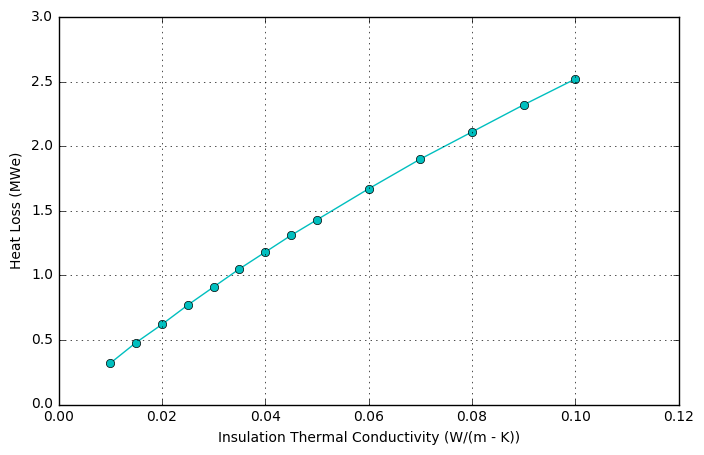

    Thermal Conductivity (W/(m - K))     Heat Loss (MWe) 
                 0.010                         0.32      
                 0.015                         0.48      
                 0.020                         0.62      
                 0.025                         0.77      
                 0.030                         0.91      
                 0.035                         1.05      
                 0.040                         1.18      
                 0.045                         1.31      
                 0.050                         1.43      
                 0.060                         1.67      
                 0.070                         1.90      
                 0.080                         2.11      
                 0.090                         2.32      
                 0.100                         2.52      


In [6]:
Insulation_Conductivity =(0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.04, 0.045, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1)
Heat_Loss = (0.32, 0.48, 0.62, 0.77, 0.91, 1.05, 1.18, 1.31, 1.43, 1.67, 1.9, 2.11, 2.32, 2.52)

plt.plot(Insulation_Conductivity, Heat_Loss, 'co-')
plt.xlabel("Insulation Thermal Conductivity (W/(m - K))")
plt.ylabel("Heat Loss (MWe)")
plt.grid(True)
plt.show()

print ('{:^40}'.format('Thermal Conductivity (W/(m - K))'), '{:^16}'.format('Heat Loss (MWe)'))
for i in range(len(Heat_Loss)): 
    print ('{:^40.3f}'.format(Insulation_Conductivity[i]), \
        '{:^16.2f}'.format(Heat_Loss[i]))